In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import os

In [7]:
test_data=pd.read_csv('../Dataset/DigitRecognition/test.csv')
training_data=pd.read_csv('../Dataset/DigitRecognition/train.csv')



In [11]:
def image_sample(training_data,index):
    data=training_data.drop(columns='label',axis=1)
    image=data.iloc[index].to_numpy()
    image=image.reshape((28,28))
    plt.figure(figsize=(3,3))
    plt.imshow(image,cmap='gray')
    plt.title(training_data.iloc[index,0])
    plt.show()

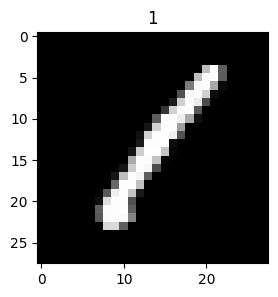

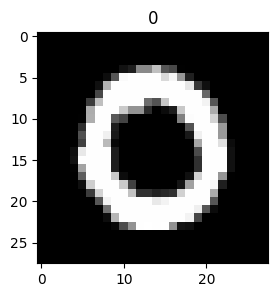

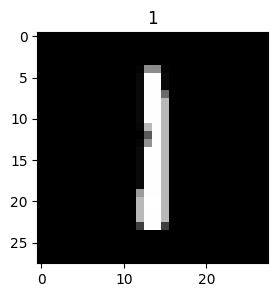

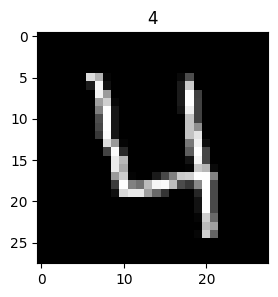

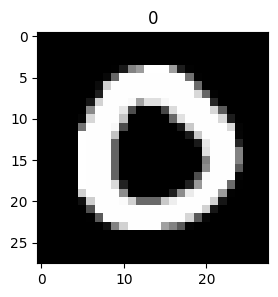

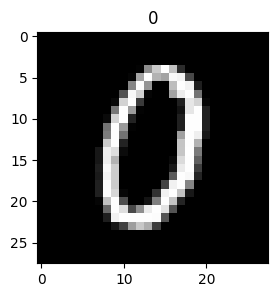

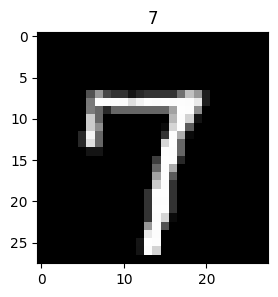

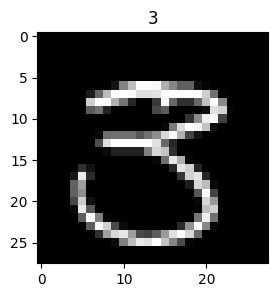

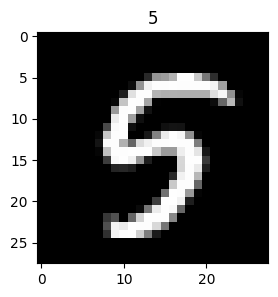

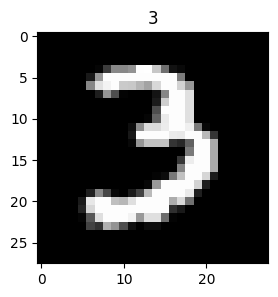

In [12]:
for i in range(10):
    image_sample(training_data,i)

In [16]:
y_train=training_data['label']
x_train=training_data.drop('label',axis=1).values/255.0
test_data=test_data.values/255.0

np.shape(test_data)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [17]:
X_train,X_test,y_train,y_test= train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [19]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)
test_data=test_data.reshape(-1,28,28)
np.shape(test_data)

(28000, 28, 28)

In [27]:
def scheduler(epoch,lr):
    if epoch<10:
        return lr
    else:
        return lr*np.exp(-0.1)

In [23]:
model=Sequential()
model=tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters=32,kernel_size=(2,2),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [28]:
callback=keras.callbacks.LearningRateScheduler(scheduler)
model.summary()
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,314 (415.29 KB)

 Trainable params: 106,314 (415.29 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(X_train, y_train, epochs = 20, verbose = 1, validation_data = (X_test, y_test), validation_split=0.1, callbacks=[callback])


Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8528 - loss: 0.4730 - val_accuracy: 0.9756 - val_loss: 0.0896 - learning_rate: 0.0010
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9794 - loss: 0.0693 - val_accuracy: 0.9801 - val_loss: 0.0640 - learning_rate: 0.0010
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9845 - loss: 0.0465 - val_accuracy: 0.9806 - val_loss: 0.0618 - learning_rate: 0.0010
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9879 - loss: 0.0362 - val_accuracy: 0.9851 - val_loss: 0.0477 - learning_rate: 0.0010
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9914 - loss: 0.0295 - val_accuracy: 0.9858 - val_loss: 0.0449 - learning_rate: 0.0010
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9916 - loss: 0.0246 - val_accuracy: 0.9885 - val_loss: 0.0385 - learning_rate: 0.0010
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9941 -

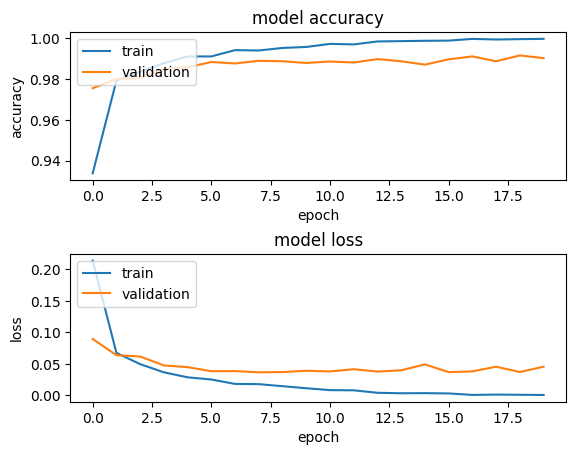

In [36]:
fig=plt.figure()
plt1=fig.add_subplot(2,1,1)
plt1.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt1.set_title('model accuracy')
plt1.set_ylabel('accuracy')
plt1.set_xlabel('epoch')
plt1.legend(['train','validation'],loc='upper left')
plt.subplots_adjust(hspace=0.5)

plt2=fig.add_subplot(2,1,2)
plt2.plot(history.history['loss'])
plt2.plot(history.history['val_loss'])
plt2.set_title('model loss')
plt2.set_ylabel('loss')
plt2.set_xlabel('epoch')
plt2.legend(['train','validation'],loc='upper left')